In [ ]:
'''Interview Questions:

1. What are the key hyperparameters in KNN?
--->Key Hyperparameters in KNN:
a)n_neighbors (K): Defines the number of nearest neighbors to consider for classification or regression.
b)metric: Determines the distance function used to find nearest neighbors.
c)weights: Defines how neighbors contribute to the classification.
d)algorithm: Specifies the algorithm used to compute nearest neighbors.

2. What distance metrics can be used in KNN?
--->Common Distance Metrics in KNN:
a)Euclidean Distance (metric='euclidean'): Standard straight-line distance (most commonly used).
b)Manhattan Distance (metric='manhattan'): Sum of absolute differences (useful for grid-like data).
c)Minkowski Distance (metric='minkowski'): Generalized metric that includes both Euclidean and Manhattan (p=2 is Euclidean, p=1 is Manhattan).
d)Chebyshev Distance (metric='chebyshev'): Maximum absolute difference between coordinates.
e)Hamming Distance (metric='hamming'): Used for categorical or binary data, counting differing elements.'''


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv(r"C:\Users\Asad shaikh\Documents\Zoo.csv")
print("Dataset Head:")
print(data.head())

Dataset Head:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4   

In [2]:
# Check actual column names
print("\nColumn Names:")
print(data.columns)

# Ensure correct column name for class label
class_column = "type"

# Drop 'animal name' before correlation analysis
data_numeric = data.drop(columns=["animal name"])  # Keep only numeric columns

# Data Summary
print("\nDataset Info:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

# Checking class distribution
print("\nClass Distribution:")
print(data[class_column].value_counts())



Column Names:
Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         

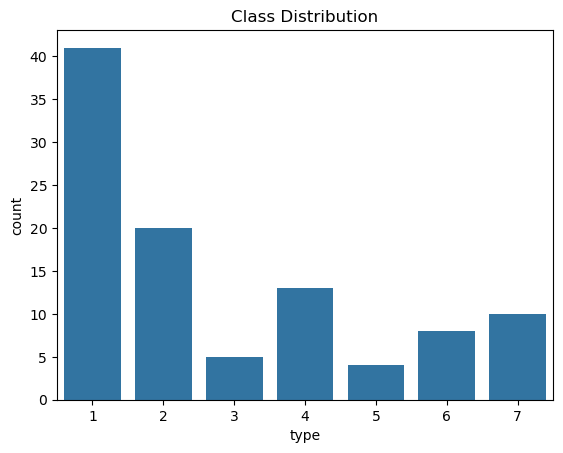

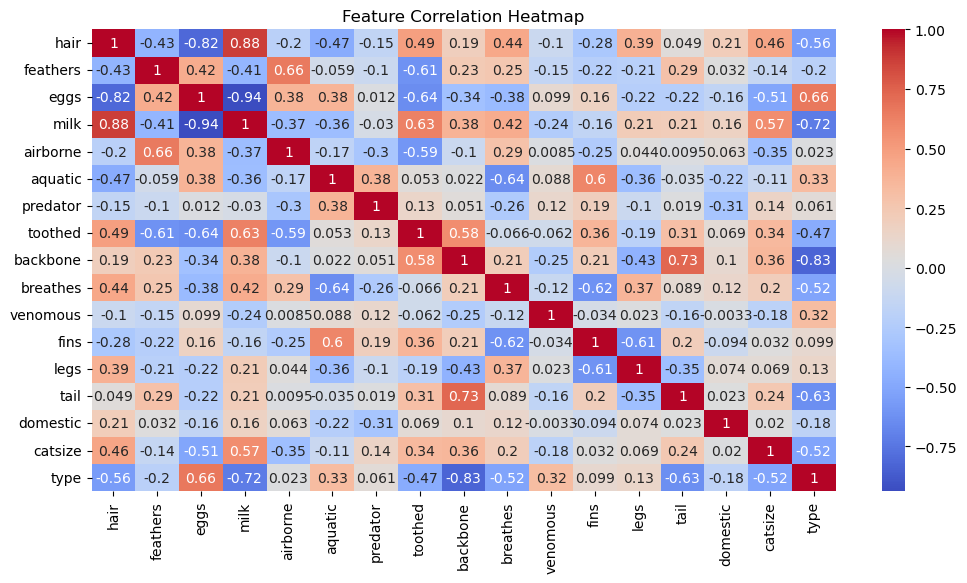

In [3]:
# Visualizing class distribution
sns.countplot(x=class_column, data=data)
plt.title("Class Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting Features and Target
X = data.drop(columns=["animal name", class_column])  # Dropping animal name as it's not relevant
y = data[class_column]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

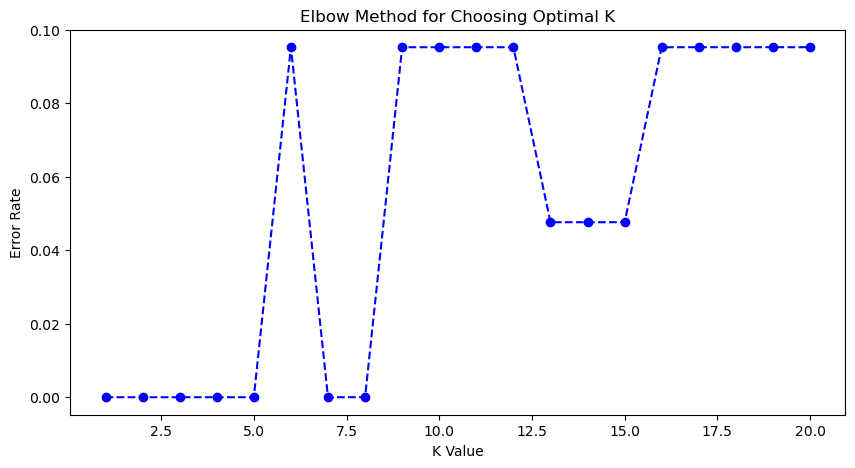

In [4]:
# Finding Optimal K using Elbow Method
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred_k != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Choosing Optimal K")
plt.show()

# Selecting optimal K (assumed 5 based on visualization, can be adjusted)
k_optimal = 5
knn = KNeighborsClassifier(n_neighbors=k_optimal, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21


Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]

Accuracy Score: 1.0


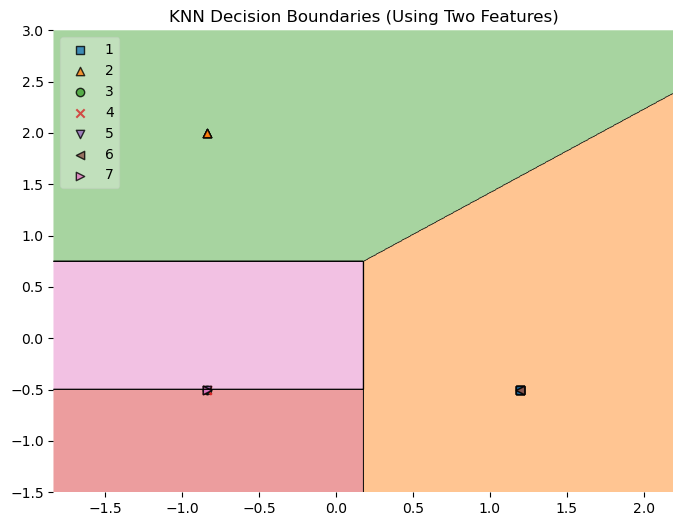

In [5]:
# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Decision Boundary Visualization (using only two features for 2D representation)
X_2D = X.iloc[:, :2]  # Select first two numeric features
y_2D = y
X_2D_train, X_2D_test, y_2D_train, y_2D_test = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42, stratify=y_2D)
scaler_2D = StandardScaler()
X_2D_train_scaled = scaler_2D.fit_transform(X_2D_train)
X_2D_test_scaled = scaler_2D.transform(X_2D_test)
knn_2D = KNeighborsClassifier(n_neighbors=k_optimal, metric='euclidean')
knn_2D.fit(X_2D_train_scaled, y_2D_train)

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_2D_test_scaled, y_2D_test.to_numpy(), clf=knn_2D, legend=2)
plt.title("KNN Decision Boundaries (Using Two Features)")
plt.show()